In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Importing of data

In [2]:
raw_data = pd.read_csv('fraud_oracle.csv')
raw_data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
raw_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
raw_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


# Remove Outliers

In [6]:
# Remove Outlier for age is there is entries for Age = 0

raw_data = raw_data[raw_data['Age'] != 0]
raw_data.reset_index(inplace=True)
raw_data.drop("index", axis=1, inplace=True)

# Feature selection using f_classif and mutual_info_classif

In [7]:
raw_data['RepNumber'] = raw_data['RepNumber'].astype(str)
raw_data['WeekOfMonth'] = raw_data['WeekOfMonth'].astype(str)
raw_data['WeekOfMonthClaimed'] = raw_data['WeekOfMonthClaimed'].astype(str)

In [8]:
def split_columns_temp(df):
    cat_lst = []
    num_lst = []
    for name in df.columns:
        if name in ["FraudFound_P", "PolicyNumber","Days_Policy_Accident","PolicyType"]:
            continue
        if df[name].dtype != 'object':
            num_lst.append(name)
        else:
            cat_lst.append(name)

    return cat_lst, num_lst

In [9]:
categorical_lst, num_lst = split_columns_temp(raw_data)
print("Categorical Variables: ",categorical_lst)
print("Numerical Variables:",num_lst)

Categorical Variables:  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Variables: ['Age', 'Deductible', 'DriverRating', 'Year']


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X, y = raw_data[num_lst], raw_data['FraudFound_P']

# Take top 50% for each classifier
proportion = 0.5
k = int(len(num_lst) * proportion)

# Populate features list
numerical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [f_classif, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    numerical_features.extend(new_features)

# Retain unique elements
numerical_features = list(set(numerical_features))
numerical_features

f_classif ['Age', 'Deductible']
mutual_info_classif ['Age', 'Deductible']


['Age', 'Deductible']

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Encode categorical variables
label_encoder = LabelEncoder()
df = raw_data.copy()
X, y = df[categorical_lst], df['FraudFound_P']
for var in categorical_lst:
    X[var] = label_encoder.fit_transform(raw_data[var])

# We take top 50% for each classifier
proportion = 0.5
k = int(len(categorical_lst) * proportion)

# Populate features list
categorical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [chi2, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    categorical_features.extend(new_features)

# Retain unique elements
categorical_features = list(set(categorical_features))
categorical_features

chi2 ['DayOfWeek', 'Make', 'MonthClaimed', 'Fault', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'BasePolicy']


C:\Users\hein_\AppData\Local\Temp\ipykernel_20796\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_20796\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_20796\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

mutual_info_classif ['DayOfWeek', 'AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'Days_Policy_Claim', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim', 'BasePolicy']


['MonthClaimed',
 'VehicleCategory',
 'BasePolicy',
 'PoliceReportFiled',
 'AccidentArea',
 'Fault',
 'WeekOfMonthClaimed',
 'AgeOfVehicle',
 'AddressChange_Claim',
 'AgentType',
 'DayOfWeek',
 'VehiclePrice',
 'Sex',
 'AgeOfPolicyHolder',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'NumberOfSuppliments',
 'Make']

In [12]:
final_features = []

In [13]:
final_features.extend(numerical_features)
final_features.extend(categorical_features)
final_features.append('FraudFound_P')

In [14]:
final_features

['Age',
 'Deductible',
 'MonthClaimed',
 'VehicleCategory',
 'BasePolicy',
 'PoliceReportFiled',
 'AccidentArea',
 'Fault',
 'WeekOfMonthClaimed',
 'AgeOfVehicle',
 'AddressChange_Claim',
 'AgentType',
 'DayOfWeek',
 'VehiclePrice',
 'Sex',
 'AgeOfPolicyHolder',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'NumberOfSuppliments',
 'Make',
 'FraudFound_P']

# After looking at the data, we have narrowed down to the following features to be included in our final dataframe.

In [15]:
final_df = raw_data[final_features].copy()

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  15100 non-null  int64 
 1   Deductible           15100 non-null  int64 
 2   MonthClaimed         15100 non-null  object
 3   VehicleCategory      15100 non-null  object
 4   BasePolicy           15100 non-null  object
 5   PoliceReportFiled    15100 non-null  object
 6   AccidentArea         15100 non-null  object
 7   Fault                15100 non-null  object
 8   WeekOfMonthClaimed   15100 non-null  object
 9   AgeOfVehicle         15100 non-null  object
 10  AddressChange_Claim  15100 non-null  object
 11  AgentType            15100 non-null  object
 12  DayOfWeek            15100 non-null  object
 13  VehiclePrice         15100 non-null  object
 14  Sex                  15100 non-null  object
 15  AgeOfPolicyHolder    15100 non-null  object
 16  Days

### Binary Categorical Variables

In [17]:
for column in categorical_features:
    if len(final_df[column].unique()) == 2:
        print(column, final_df[column].unique())
        print()

PoliceReportFiled ['No' 'Yes']

AccidentArea ['Urban' 'Rural']

Fault ['Policy Holder' 'Third Party']

AgentType ['External' 'Internal']

Sex ['Female' 'Male']



### Multi-categorical Variables

In [18]:
for column in categorical_features:
    if len(final_df[column].unique()) > 2:
        print(column, final_df[column].unique())
        print()

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

VehicleCategory ['Sport' 'Utility' 'Sedan']

BasePolicy ['Liability' 'Collision' 'All Perils']

WeekOfMonthClaimed ['1' '4' '2' '3' '5']

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years'
 'new']

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

AgeOfPolicyHolder ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 'over 65' '18 to 20']

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15']

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 

## Ordinal Features
1) AgeOfPolicyHolder
2) PastNumberOfClaims
3) VehiclePrice
4) NumberOfSuppliments
5) Days_Policy_Claim

In [19]:
ordinal_features = ['AgeOfPolicyHolder','PastNumberOfClaims',
                    'VehiclePrice','NumberOfSuppliments','Days_Policy_Claim']

# Feature Engineering and Preprocessing

In [20]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [21]:
def convert_label(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [22]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [23]:
def scaler(df,columns):
    age = []
    deductible = []
    scaler = MinMaxScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        age.append(row[0])
        deductible.append(row[1])
    df['Age'] = age
    df['Deductible'] = deductible
    return df

In [24]:
def convert_ordinal(df, name, mapping):
    encoder = LabelEncoder()
    encoder.classes_ = [str(category) for category, _ in sorted(mapping.items(), key=lambda x: x[1])]
    df[name] = encoder.fit_transform(df[name])
    return df

In [25]:
def count_encoder(df, columns):
    for name in columns:
        encoder = ce.CountEncoder(cols=name, normalize=True)
        df[name] = encoder.fit_transform(df[name])
    return df

In [26]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(final_df)

In [27]:
multicat_features = [feature for feature in categorical_lst if feature not in ordinal_features]
multicat_features.remove('MonthClaimed')
multicat_features.remove('Make')

print("Binary Variable:",binary_lst)
print("Multi-Categorical Variable:",multicat_features)
print("Numerical:",num_lst)
print("Ordinal:", ordinal_features)
print("CountEncoder", ['Make','MonthClaimed'])

Binary Variable: ['PoliceReportFiled', 'AccidentArea', 'Fault', 'AgentType', 'Sex']
Multi-Categorical Variable: ['VehicleCategory', 'BasePolicy', 'WeekOfMonthClaimed', 'AgeOfVehicle', 'AddressChange_Claim', 'DayOfWeek']
Numerical: ['Age', 'Deductible', 'FraudFound_P']
Ordinal: ['AgeOfPolicyHolder', 'PastNumberOfClaims', 'VehiclePrice', 'NumberOfSuppliments', 'Days_Policy_Claim']
CountEncoder ['Make', 'MonthClaimed']


# Encoding all the categorical variables using helper functions

## Label Encoding for Binary Features

In [28]:
convert_label(final_df, binary_lst)

,Age,Deductible,MonthClaimed,VehicleCategory,BasePolicy,PoliceReportFiled,AccidentArea,Fault,WeekOfMonthClaimed,AgeOfVehicle,...,AgentType,DayOfWeek,VehiclePrice,Sex,AgeOfPolicyHolder,Days_Policy_Claim,PastNumberOfClaims,NumberOfSuppliments,Make,FraudFound_P
0,21,300,Jan,Sport,Liability,0,1,0,1,3 years,...,0,Wednesday,more than 69000,0,26 to 30,more than 30,none,none,Honda,0
1,34,400,Jan,Sport,Collision,1,1,0,4,6 years,...,0,Wednesday,more than 69000,1,31 to 35,more than 30,none,none,Honda,0
2,47,400,Nov,Sport,Collision,0,1,0,2,7 years,...,0,Friday,more than 69000,1,41 to 50,more than 30,1,none,Honda,0
3,65,400,Jul,Sport,Liability,1,0,1,1,more than 7,...,0,Saturday,20000 to 29000,1,51 to 65,more than 30,1,more than 5,Toyota,0
4,27,400,Feb,Sport,Collision,0,1,1,2,5 years,...,0,Monday,more than 69000,0,31 to 35,more than 30,none,none,Honda,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,35,400,Nov,Sedan,Collision,0,1,0,5,6 years,...,0,Friday,20000 to 29000,1,31 to 35,more than 30,2 to 4,none,Toyota,1
15096,30,400,Dec,Sport,Liability,0,1,0,1,6 years,...,0,Thursday,30000 to 39000,1,31 to 35,more than 30,more than 4,more than 5,Pontiac,0
15097,24,400,Dec,Sedan,Collision,0,0,0,1,5 years,...,0,Thursday,20000 to 29000,1,26 to 30,more than 30,more than 4,1 to 2,Toyota,1
15098,34,400,Dec,Sedan,All Perils,0,1,1,2,2 years,...,0,Monday,20000 to 29000,0,31 to 35,more than 30,none,more than 5,Toyota,0


## One Hot Encoding

In [29]:
oneHotEncode(final_df,multicat_features)

,Age,Deductible,MonthClaimed,VehicleCategory,BasePolicy,PoliceReportFiled,AccidentArea,Fault,WeekOfMonthClaimed,AgeOfVehicle,...,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,21,300,Jan,Sport,Liability,0,1,0,1,3 years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34,400,Jan,Sport,Collision,1,1,0,4,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,47,400,Nov,Sport,Collision,0,1,0,2,7 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65,400,Jul,Sport,Liability,1,0,1,1,more than 7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,400,Feb,Sport,Collision,0,1,1,2,5 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,35,400,Nov,Sedan,Collision,0,1,0,5,6 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15096,30,400,Dec,Sport,Liability,0,1,0,1,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15097,24,400,Dec,Sedan,Collision,0,0,0,1,5 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15098,34,400,Dec,Sedan,All Perils,0,1,1,2,2 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Scaling of Numberical Features

In [30]:
# We do not want to scale the label
scaler(final_df, ['Age','Deductible'])

,Age,Deductible,MonthClaimed,VehicleCategory,BasePolicy,PoliceReportFiled,AccidentArea,Fault,WeekOfMonthClaimed,AgeOfVehicle,...,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0.078125,0.00,Jan,Sport,Liability,0,1,0,1,3 years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.281250,0.25,Jan,Sport,Collision,1,1,0,4,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.484375,0.25,Nov,Sport,Collision,0,1,0,2,7 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.765625,0.25,Jul,Sport,Liability,1,0,1,1,more than 7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.171875,0.25,Feb,Sport,Collision,0,1,1,2,5 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.296875,0.25,Nov,Sedan,Collision,0,1,0,5,6 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15096,0.218750,0.25,Dec,Sport,Liability,0,1,0,1,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15097,0.125000,0.25,Dec,Sedan,Collision,0,0,0,1,5 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15098,0.281250,0.25,Dec,Sedan,All Perils,0,1,1,2,2 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Label Encoding for Ordinal Features

In [31]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [32]:
age_policy_holder_mapping = {'26 to 30': 2, '31 to 35':3, '41 to 50': 5, '51 to 65': 6, '21 to 25': 1, '36 to 40':4, 'over 65': 7, '18 to 20': 0}
past_number_of_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
vehicle_price_mapping = {'more than 69000': 5, '20000 to 29000': 1, '30000 to 39000': 2, 'less than 20000': 0, '40000 to 59000': 3, '60000 to 69000': 4}
NoS_mapping = {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3}
DPC_mapping = {'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3}

mapper_lst = [age_policy_holder_mapping, past_number_of_claims_mapping, vehicle_price_mapping, NoS_mapping,DPC_mapping]

mapper_lst

[{'26 to 30': 2,
  '31 to 35': 3,
  '41 to 50': 5,
  '51 to 65': 6,
  '21 to 25': 1,
  '36 to 40': 4,
  'over 65': 7,
  '18 to 20': 0},
 {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
 {'more than 69000': 5,
  '20000 to 29000': 1,
  '30000 to 39000': 2,
  'less than 20000': 0,
  '40000 to 59000': 3,
  '60000 to 69000': 4},
 {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
 {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}]

In [33]:
for i in range(0,5):
    convert_ordinal(final_df, ordinal_features[i], mapper_lst[i]);

## Frequency Encoding for Categorical Variables with more than 10 categories

In [34]:
count_encoder(final_df, ['Make','MonthClaimed'])

,Age,Deductible,MonthClaimed,VehicleCategory,BasePolicy,PoliceReportFiled,AccidentArea,Fault,WeekOfMonthClaimed,AgeOfVehicle,...,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0.078125,0.00,0.091060,Sport,Liability,0,1,0,1,3 years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.281250,0.25,0.091060,Sport,Collision,1,1,0,4,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.484375,0.25,0.084503,Sport,Collision,0,1,0,2,7 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.765625,0.25,0.080530,Sport,Liability,1,0,1,1,more than 7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.171875,0.25,0.082119,Sport,Collision,0,1,1,2,5 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.296875,0.25,0.084503,Sedan,Collision,0,1,0,5,6 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15096,0.218750,0.25,0.075430,Sport,Liability,0,1,0,1,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15097,0.125000,0.25,0.075430,Sedan,Collision,0,0,0,1,5 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15098,0.281250,0.25,0.075430,Sedan,All Perils,0,1,1,2,2 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15100 non-null  float64
 1   Deductible                          15100 non-null  float64
 2   MonthClaimed                        15100 non-null  float64
 3   VehicleCategory                     15100 non-null  object 
 4   BasePolicy                          15100 non-null  object 
 5   PoliceReportFiled                   15100 non-null  int32  
 6   AccidentArea                        15100 non-null  int32  
 7   Fault                               15100 non-null  int32  
 8   WeekOfMonthClaimed                  15100 non-null  object 
 9   AgeOfVehicle                        15100 non-null  object 
 10  AddressChange_Claim                 15100 non-null  object 
 11  AgentType                           15100

In [36]:
final_df.head()

,Age,Deductible,MonthClaimed,VehicleCategory,BasePolicy,PoliceReportFiled,AccidentArea,Fault,WeekOfMonthClaimed,AgeOfVehicle,...,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0.078125,0.00,0.091060,Sport,Liability,0,1,0,1,3 years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.281250,0.25,0.091060,Sport,Collision,1,1,0,4,6 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.484375,0.25,0.084503,Sport,Collision,0,1,0,2,7 years,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.765625,0.25,0.080530,Sport,Liability,1,0,1,1,more than 7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.171875,0.25,0.082119,Sport,Collision,0,1,1,2,5 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Clean up the dataset to remove unnecessary columns

In [37]:
final_df.drop(multicat_features, axis=1, inplace=True)

In [38]:
final_df.reset_index(inplace = True)
final_df.drop('index', axis=1, inplace=True)

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15100 non-null  float64
 1   Deductible                          15100 non-null  float64
 2   MonthClaimed                        15100 non-null  float64
 3   PoliceReportFiled                   15100 non-null  int32  
 4   AccidentArea                        15100 non-null  int32  
 5   Fault                               15100 non-null  int32  
 6   AgentType                           15100 non-null  int32  
 7   VehiclePrice                        15100 non-null  int32  
 8   Sex                                 15100 non-null  int32  
 9   AgeOfPolicyHolder                   15100 non-null  int32  
 10  Days_Policy_Claim                   15100 non-null  int32  
 11  PastNumberOfClaims                  15100

In [40]:
final_df.head()

,Age,Deductible,MonthClaimed,PoliceReportFiled,AccidentArea,Fault,AgentType,VehiclePrice,Sex,AgeOfPolicyHolder,...,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0.078125,0.00,0.091060,0,1,0,0,5,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.281250,0.25,0.091060,1,1,0,0,5,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.484375,0.25,0.084503,0,1,0,0,5,1,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.765625,0.25,0.080530,1,0,1,0,0,1,6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.171875,0.25,0.082119,0,1,1,0,5,0,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Train Test split

In [41]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=19, stratify=y)

In [45]:
X_train.shape

(10872, 45)

In [46]:
X_val.shape

(2718, 45)

In [47]:
X_test.shape

(1510, 45)

In [48]:
y_train['FraudFound_P'].sum()

642

# Machine Learning Model Training

In [49]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings('ignore')

In [50]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))
    print("G-Mean: ", geometric_mean_score(y_test, y_pred))

In [51]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)

# Training model without handling imbalance data

## Logistic Regression

In [52]:
LR = LogisticRegression(random_state=19)

In [53]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


## Linear SVC

In [54]:
svc = LinearSVC(random_state=19)

In [55]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363


## XBG Classifier

In [56]:
xgb = XGBClassifier(random_state=19)

In [57]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005


## Voting Classifier

In [58]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc)],
    voting='hard'
)

In [59]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2557    0]
 [ 161    0]]
TN: 2557, FP: 0, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


# Imbalance Data Handling

In [60]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [61]:
def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote

In [62]:
def get_sample_SMOTEENN(X_train, y_train, neighbour, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

In [63]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    X_test = X_val
    y_test = y_val

    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)


    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [64]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    evaluate_results(y_val, y_preds)
    Precision = precision_score(y_val, y_preds)
    F2 = fbeta_score(y_val, y_preds, beta=2)
    Recall = recall_score(y_val, y_preds)
    Gmean = geometric_mean_score(y_val, y_preds)
    return Precision, Recall, F2, Gmean

In [65]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [66]:
def get_performance_visualisation(method, X_train, X_val, y_train, y_val, classifier, neighbour=5):
    Precision_lst, F2_lst, Recall_lst, resampling, Gmean_lst = [], [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall', 'G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall', 'G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall','G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

In [67]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Precision_lst, F2_lst, Recall_lst, Gmean_lst = [], [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
    df['Precision'] = Precision_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['G-mean'] = Gmean_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Precision','F2 Score','Recall','G-mean'],
           title= 'Resampling Performance',
           ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

### XGB Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[2545   12]
 [ 147   14]]
TN: 2545, FP: 12, FN: 147, TP: 14


Precision:  0.5384615384615384
Recall:  0.08695652173913043
F2:  0.1044776119402985
G-Mean:  0.29419115353221614

Sampling Size: 0.2

Confusion Matrix: 
 [[2544   13]
 [ 146   15]]
TN: 2544, FP: 13, FN: 146, TP: 15


Precision:  0.5357142857142857
Recall:  0.09316770186335403
F2:  0.11160714285714286
G-Mean:  0.3044569420173865

Sampling Size: 0.3

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005

Sampling Size: 0.4

Confusion Matrix: 
 [[2542   15]
 [ 147   14]]
TN: 2542, FP: 15, FN: 147, TP: 14


Precision:  0.4827586206896552
Recall:  0.08695652173913043
F2:  0.1040118870728083
G-Mean:  0.2940177087965746

Sampling Size: 0.5

Confusion Matrix: 
 [[2537   20]
 [ 147   14]]
TN: 2537, FP: 20, FN: 147, TP: 14


Precision:  0.411764705882352

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.538462,0.104478,0.086957,0.294191,0.1
1,0.535714,0.111607,0.093168,0.304457,0.2
2,0.466667,0.103858,0.086957,0.293960,0.3
3,0.482759,0.104012,0.086957,0.294018,0.4
4,0.411765,0.103245,0.086957,0.293728,0.5
5,0.500000,0.089820,0.074534,0.272368,0.6
6,0.451613,0.103704,0.086957,0.293902,0.7
7,0.565217,0.097451,0.080745,0.283601,0.8
8,0.517241,0.111441,0.093168,0.304397,0.9
9,0.461538,0.089552,0.074534,0.272261,1.0


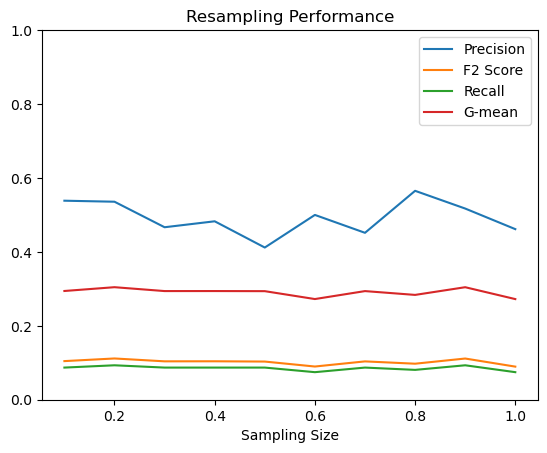

In [68]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2423  134]
 [ 129   32]]
TN: 2423, FP: 134, FN: 129, TP: 32


Precision:  0.1927710843373494
Recall:  0.19875776397515527
F2:  0.19753086419753088
G-Mean:  0.4339836760705841

Sampling Size: 0.2

Confusion Matrix: 
 [[2375  182]
 [ 120   41]]
TN: 2375, FP: 182, FN: 120, TP: 41


Precision:  0.18385650224215247
Recall:  0.2546583850931677
F2:  0.23644752018454437
G-Mean:  0.48634609516764454

Sampling Size: 0.3

Confusion Matrix: 
 [[2327  230]
 [ 119   42]]
TN: 2327, FP: 230, FN: 119, TP: 42


Precision:  0.15441176470588236
Recall:  0.2608695652173913
F2:  0.22925764192139736
G-Mean:  0.48724179538788315

Sampling Size: 0.4

Confusion Matrix: 
 [[2329  228]
 [ 118   43]]
TN: 2329, FP: 228, FN: 118, TP: 43


Precision:  0.15867158671586715
Recall:  0.2670807453416149
F2:  0.2349726775956284
G-Mean:  0.49321998997030186

Sampling Size: 0.5

Confusion Matrix: 
 [[2304  253]
 [ 111   50]]
TN: 2304, FP: 253, FN: 111, TP: 50


Precision:  0.16501650

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.192771,0.197531,0.198758,0.433984,0.1
1,0.183857,0.236448,0.254658,0.486346,0.2
2,0.154412,0.229258,0.260870,0.487242,0.3
3,0.158672,0.234973,0.267081,0.493220,0.4
4,0.165017,0.263992,0.310559,0.528991,0.5
5,0.181818,0.294118,0.347826,0.559952,0.6
6,0.160772,0.261780,0.310559,0.528071,0.7
7,0.166667,0.275468,0.329193,0.543209,0.8


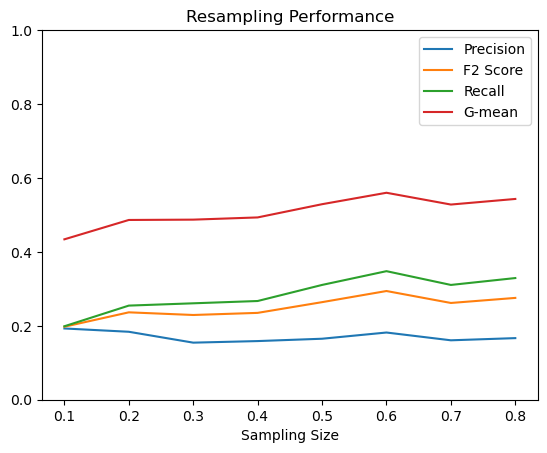

In [69]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005

Sampling Size: 2

Confusion Matrix: 
 [[2511   46]
 [ 146   15]]
TN: 2511, FP: 46, FN: 146, TP: 15


Precision:  0.2459016393442623
Recall:  0.09316770186335403
F2:  0.10638297872340426
G-Mean:  0.30247583469503014

Sampling Size: 3

Confusion Matrix: 
 [[2483   74]
 [ 137   24]]
TN: 2483, FP: 74, FN: 137, TP: 24


Precision:  0.24489795918367346
Recall:  0.14906832298136646
F2:  0.16172506738544476
G-Mean:  0.38046584765136326

Sampling Size: 4

Confusion Matrix: 
 [[2465   92]
 [ 134   27]]
TN: 2465, FP: 92, FN: 134, TP: 27


Precision:  0.226890756302521
Recall:  0.16770186335403728
F2:  0.1769331585845347
G-Mean:  0.4020796024595149

Sampling Size: 5

Confusion Matrix: 
 [[2449  108]
 [ 135   26]]
TN: 2449, FP: 108, FN: 135, TP: 26


Precision:  0.19402985074626866
Reca

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.466667,0.103858,0.086957,0.293960,1
1,0.245902,0.106383,0.093168,0.302476,2
2,0.244898,0.161725,0.149068,0.380466,3
3,0.226891,0.176933,0.167702,0.402080,4
4,0.194030,0.167095,0.161491,0.393281,5
5,0.233533,0.240444,0.242236,0.479698,6
6,0.223958,0.257177,0.267081,0.501515,7
7,0.184080,0.218935,0.229814,0.463761,8
8,0.166667,0.200472,0.211180,0.444004,9
9,0.173333,0.224396,0.242236,0.473936,10


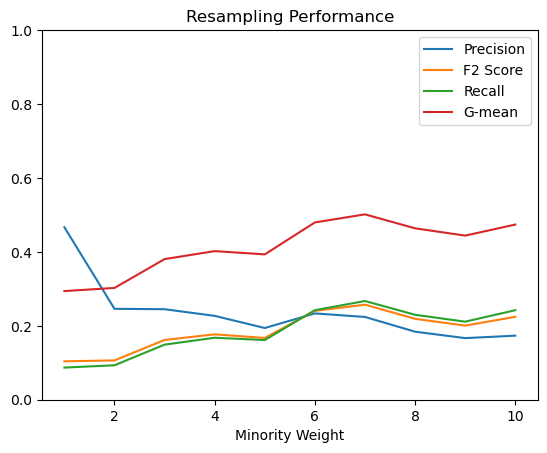

In [70]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

### Logistic Regression

Sampling Size: 0.1

Confusion Matrix: 
 [[2550    7]
 [ 159    2]]
TN: 2550, FP: 7, FN: 159, TP: 2


Precision:  0.2222222222222222
Recall:  0.012422360248447204
F2:  0.015313935681470138
G-Mean:  0.11130297841883806

Sampling Size: 0.2

Confusion Matrix: 
 [[2492   65]
 [ 149   12]]
TN: 2492, FP: 65, FN: 149, TP: 12


Precision:  0.15584415584415584
Recall:  0.07453416149068323
F2:  0.08321775312066575
G-Mean:  0.2695171093039924

Sampling Size: 0.3

Confusion Matrix: 
 [[2367  190]
 [ 126   35]]
TN: 2367, FP: 190, FN: 126, TP: 35


Precision:  0.15555555555555556
Recall:  0.21739130434782608
F2:  0.20138089758342922
G-Mean:  0.4485954342890269

Sampling Size: 0.4

Confusion Matrix: 
 [[2240  317]
 [ 107   54]]
TN: 2240, FP: 317, FN: 107, TP: 54


Precision:  0.14555256064690028
Recall:  0.33540372670807456
F2:  0.2660098522167488
G-Mean:  0.5420540417803716

Sampling Size: 0.5

Confusion Matrix: 
 [[2088  469]
 [  87   74]]
TN: 2088, FP: 469, FN: 87, TP: 74


Precision:  0.1362799263

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.222222,0.015314,0.012422,0.111303,0.1
1,0.155844,0.083218,0.074534,0.269517,0.2
2,0.155556,0.201381,0.217391,0.448595,0.3
3,0.145553,0.266010,0.335404,0.542054,0.4
4,0.136280,0.311710,0.459627,0.612636,0.5
5,0.127628,0.324427,0.527950,0.638741,0.6
6,0.131714,0.361150,0.639752,0.685469,0.7
7,0.128806,0.367156,0.683230,0.696012,0.8
8,0.124204,0.368852,0.726708,0.701598,0.9
9,0.125000,0.377764,0.763975,0.711848,1.0


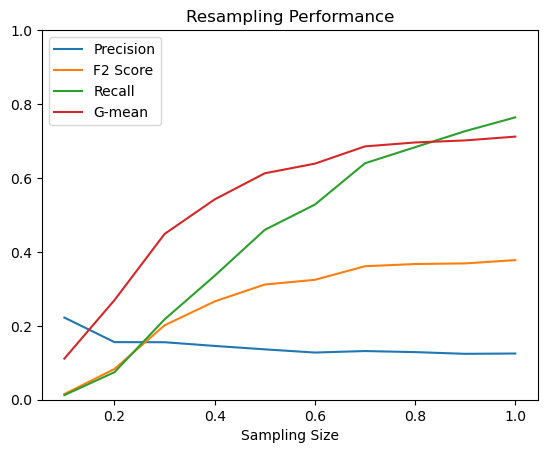

In [71]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2463   94]
 [ 143   18]]
TN: 2463, FP: 94, FN: 143, TP: 18


Precision:  0.16071428571428573
Recall:  0.11180124223602485
F2:  0.11904761904761905
G-Mean:  0.3281634104299046

Sampling Size: 0.2

Confusion Matrix: 
 [[2116  441]
 [  90   71]]
TN: 2116, FP: 441, FN: 90, TP: 71


Precision:  0.138671875
Recall:  0.4409937888198758
F2:  0.3070934256055363
G-Mean:  0.6040998167821579

Sampling Size: 0.3

Confusion Matrix: 
 [[1850  707]
 [  62   99]]
TN: 1850, FP: 707, FN: 62, TP: 99


Precision:  0.1228287841191067
Recall:  0.6149068322981367
F2:  0.34137931034482766
G-Mean:  0.6669989641712609

Sampling Size: 0.4

Confusion Matrix: 
 [[1719  838]
 [  43  118]]
TN: 1719, FP: 838, FN: 43, TP: 118


Precision:  0.12343096234309624
Recall:  0.7329192546583851
F2:  0.36874999999999997
G-Mean:  0.7019410483348388

Sampling Size: 0.5

Confusion Matrix: 
 [[1633  924]
 [  30  131]]
TN: 1633, FP: 924, FN: 30, TP: 131


Precision:  0.12417061611374408
Reca

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.160714,0.119048,0.111801,0.328163,0.1
1,0.138672,0.307093,0.440994,0.604100,0.2
2,0.122829,0.341379,0.614907,0.666999,0.3
3,0.123431,0.368750,0.732919,0.701941,0.4
4,0.124171,0.385521,0.813665,0.720859,0.5
5,0.126479,0.398738,0.863354,0.734314,0.6
6,0.126984,0.404949,0.894410,0.740351,0.7
7,0.125977,0.403900,0.900621,0.739114,0.8


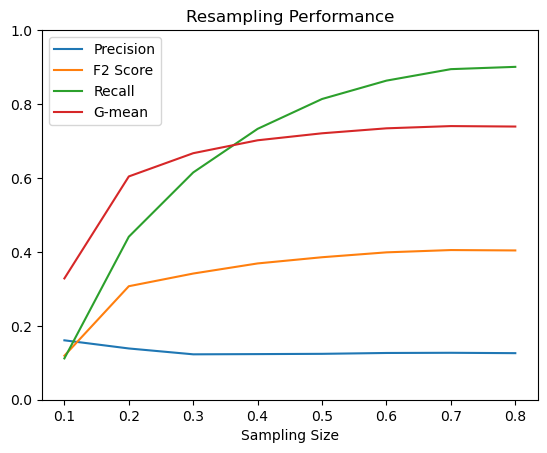

In [72]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0

Sampling Size: 2

Confusion Matrix: 
 [[2537   20]
 [ 158    3]]
TN: 2537, FP: 20, FN: 158, TP: 3


Precision:  0.13043478260869565
Recall:  0.018633540372670808
F2:  0.022488755622188907
G-Mean:  0.1359698313715265

Sampling Size: 3

Confusion Matrix: 
 [[2513   44]
 [ 156    5]]
TN: 2513, FP: 44, FN: 156, TP: 5


Precision:  0.10204081632653061
Recall:  0.031055900621118012
F2:  0.03607503607503607
G-Mean:  0.1747040385329715

Sampling Size: 4

Confusion Matrix: 
 [[2457  100]
 [ 145   16]]
TN: 2457, FP: 100, FN: 145, TP: 16


Precision:  0.13793103448275862
Recall:  0.09937888198757763
F2:  0.10526315789473685
G-Mean:  0.3090183487568205

Sampling Size: 5

Confusion Matrix: 
 [[2384  173]
 [ 129   32]]
TN: 2384, FP: 173, FN: 129, TP: 32


Precision:  0.15609756097560976
Recall:  0.19875776397515527
F2:  0.18845700824499412
G-Mean:  0.

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.000000,0.000000,0.000000,0.000000,1
1,0.130435,0.022489,0.018634,0.135970,2
2,0.102041,0.036075,0.031056,0.174704,3
3,0.137931,0.105263,0.099379,0.309018,4
4,0.156098,0.188457,0.198758,0.430477,5
5,0.155488,0.262346,0.316770,0.531464,6
6,0.137931,0.288809,0.397516,0.579078,7
7,0.135678,0.326350,0.503106,0.633703,8
8,0.134722,0.355572,0.602484,0.675050,9
9,0.132859,0.376597,0.695652,0.704825,10


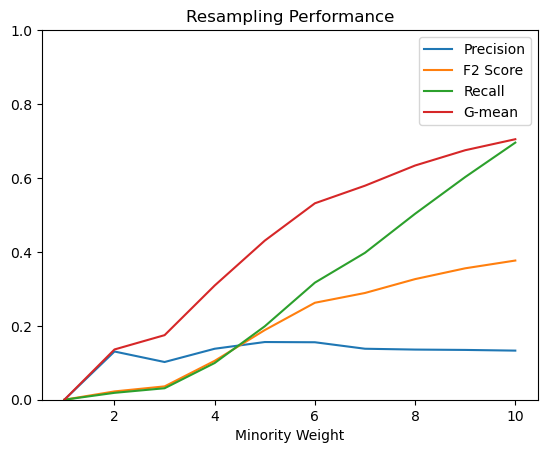

In [73]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

In [74]:
newLR = LogisticRegression(class_weight="balanced", random_state=19)
newLR.fit(X_train, y_train)
y_pred = newLR.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1524 1033]
 [  12  149]]
TN: 1524, FP: 1033, FN: 12, TP: 149


Precision:  0.1260575296108291
Recall:  0.9254658385093167
F2:  0.4079956188389923
G-Mean:  0.7426895541948388


### Linear SVC

Sampling Size: 0.1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 0.2

Confusion Matrix: 
 [[2509   48]
 [ 152    9]]
TN: 2509, FP: 48, FN: 152, TP: 9


Precision:  0.15789473684210525
Recall:  0.055900621118012424
F2:  0.06419400855920114
G-Mean:  0.23420344733976972

Sampling Size: 0.3

Confusion Matrix: 
 [[2386  171]
 [ 126   35]]
TN: 2386, FP: 171, FN: 126, TP: 35


Precision:  0.16990291262135923
Recall:  0.21739130434782608
F2:  0.2058823529411765
G-Mean:  0.4503922820533753

Sampling Size: 0.4

Confusion Matrix: 
 [[2239  318]
 [ 109   52]]
TN: 2239, FP: 318, FN: 109, TP: 52


Precision:  0.14054054054054055
Recall:  0.32298136645962733
F2:  0.25641025641025644
G-Mean:  0.5318025513833526

Sampling Size: 0.5

Confusion Matrix: 
 [[2084  473]
 [  87   74]]
TN: 2084, FP: 473, FN: 87, TP: 74


Precision:  0.13528336380255943
Recall

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.500000,0.007740,0.006211,0.078796,0.1
1,0.157895,0.064194,0.055901,0.234203,0.2
2,0.169903,0.205882,0.217391,0.450392,0.3
3,0.140541,0.256410,0.322981,0.531803,0.4
4,0.135283,0.310663,0.459627,0.612049,0.5
5,0.128093,0.330579,0.546584,0.646948,0.6
6,0.131677,0.365769,0.658385,0.691668,0.7
7,0.128492,0.373619,0.714286,0.704554,0.8
8,0.126135,0.382263,0.776398,0.716553,0.9
9,0.123552,0.380952,0.795031,0.716040,1.0


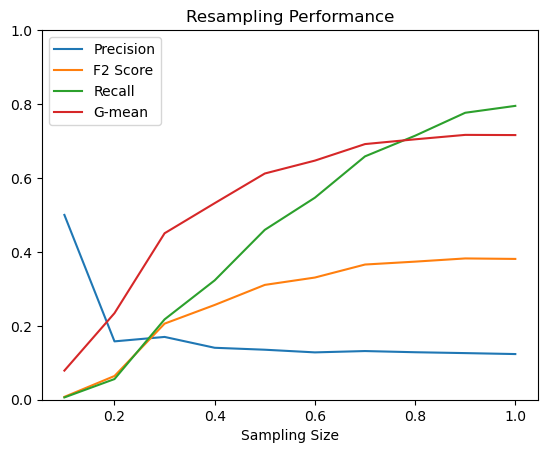

In [75]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2494   63]
 [ 150   11]]
TN: 2494, FP: 63, FN: 150, TP: 11


Precision:  0.14864864864864866
Recall:  0.06832298136645963
F2:  0.07660167130919221
G-Mean:  0.25814651423385004

Sampling Size: 0.2

Confusion Matrix: 
 [[2113  444]
 [  86   75]]
TN: 2113, FP: 444, FN: 86, TP: 75


Precision:  0.14450867052023122
Recall:  0.4658385093167702
F2:  0.3224419604471195
G-Mean:  0.6204432701393564

Sampling Size: 0.3

Confusion Matrix: 
 [[1835  722]
 [  61  100]]
TN: 1835, FP: 722, FN: 61, TP: 100


Precision:  0.12165450121654502
Recall:  0.6211180124223602
F2:  0.34106412005457026
G-Mean:  0.6676359781303781

Sampling Size: 0.4

Confusion Matrix: 
 [[1689  868]
 [  36  125]]
TN: 1689, FP: 868, FN: 36, TP: 125


Precision:  0.12588116817724068
Recall:  0.7763975155279503
F2:  0.38179596823457546
G-Mean:  0.7161294422593389

Sampling Size: 0.5

Confusion Matrix: 
 [[1593  964]
 [  24  137]]
TN: 1593, FP: 964, FN: 24, TP: 137


Precision:  0.12443233424

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.148649,0.076602,0.068323,0.258147,0.1
1,0.144509,0.322442,0.465839,0.620443,0.2
2,0.121655,0.341064,0.621118,0.667636,0.3
3,0.125881,0.381796,0.776398,0.716129,0.4
4,0.124432,0.392550,0.850932,0.728098,0.5
5,0.125654,0.402235,0.894410,0.737510,0.6
6,0.125213,0.404290,0.913043,0.739139,0.7
7,0.125632,0.407104,0.925466,0.741714,0.8


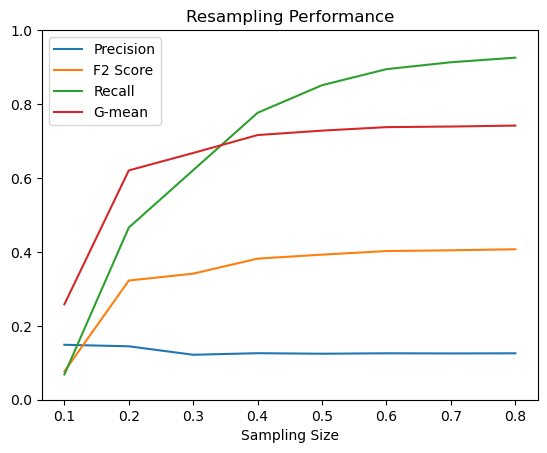

In [76]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 2

Confusion Matrix: 
 [[2553    4]
 [ 160    1]]
TN: 2553, FP: 4, FN: 160, TP: 1


Precision:  0.2
Recall:  0.006211180124223602
F2:  0.007704160246533127
G-Mean:  0.0787493731335408

Sampling Size: 3

Confusion Matrix: 
 [[2498   59]
 [ 155    6]]
TN: 2498, FP: 59, FN: 155, TP: 6


Precision:  0.09230769230769231
Recall:  0.037267080745341616
F2:  0.04231311706629055
G-Mean:  0.1908066647197413

Sampling Size: 4

Confusion Matrix: 
 [[2500   57]
 [ 155    6]]
TN: 2500, FP: 57, FN: 155, TP: 6


Precision:  0.09523809523809523
Recall:  0.037267080745341616
F2:  0.042432814710042434
G-Mean:  0.19088303320977923

Sampling Size: 5

Confusion Matrix: 
 [[2437  120]
 [ 138   23]]
TN: 2437, FP: 120, FN: 138, TP: 23


Precision:  0.16083916083916083
Recall:  0.14285714285714285
F2

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.500000,0.007740,0.006211,0.078796,1
1,0.200000,0.007704,0.006211,0.078749,2
2,0.092308,0.042313,0.037267,0.190807,3
3,0.095238,0.042433,0.037267,0.190883,4
4,0.160839,0.146125,0.142857,0.368989,5
5,0.142857,0.200893,0.223602,0.452453,6
6,0.150538,0.227519,0.260870,0.486508,7
7,0.156658,0.292113,0.372671,0.570609,8
8,0.147110,0.345679,0.521739,0.649900,9
9,0.140600,0.348473,0.552795,0.659688,10


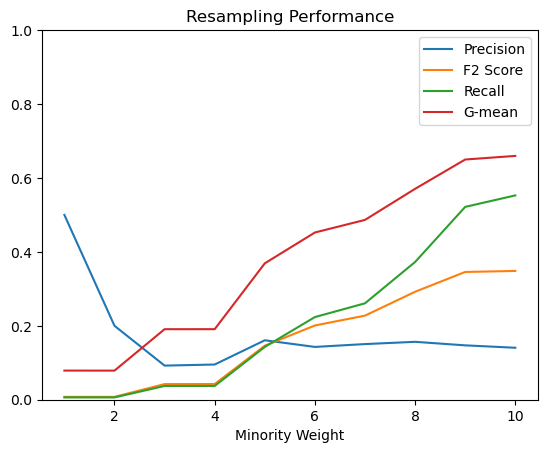

In [77]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LinearSVC)

In [78]:
newSVC = LinearSVC(class_weight="balanced", random_state=19)
newSVC.fit(X_train, y_train)
y_pred = newSVC.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1542 1015]
 [  16  145]]
TN: 1542, FP: 1015, FN: 16, TP: 145


Precision:  0.125
Recall:  0.9006211180124224
F2:  0.40188470066518844
G-Mean:  0.7369667362018131


##  Using Class Weighing on Voting Classifier

In [79]:
vc_class = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19, class_weight = {0:1, 1:9})),
                ('XGB',XGBClassifier(random_state=19, scale_pos_weight=9)),
                ('LR',LogisticRegression(random_state=19, class_weight = {0:1, 1:9}))],
    voting='hard'
)

In [80]:
train_model(X_train, X_val, y_train, y_val, vc_class)

Confusion Matrix: 
 [[2054  503]
 [  72   89]]
TN: 2054, FP: 503, FN: 72, TP: 89


Precision:  0.15033783783783783
Recall:  0.5527950310559007
F2:  0.36003236245954695
G-Mean:  0.6663722770718408


# Hyper parameter tuning for XGB

In [81]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [82]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier, sampling):

    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [83]:
def hyperopt(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf, 0.8)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [84]:
# XGB Bayesian hyperopt

num_eval = 50

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [85]:
load = False #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('TuningFS/XGB_hyperopt.pkl')
    except Exception as e:
        print(e)

100%|██████████| 50/50 [06:10<00:00,  7.41s/trial, best loss: -0.41130386121992174]


In [86]:
XGB_hyperopt[1]

{'booster': 1,
 'colsample_bylevel': 0.2917983375337534,
 'colsample_bynode': 0.7975749355233602,
 'colsample_bytree': 0.39544192286788576,
 'gamma': 7.3631002768053895,
 'learning_rate': 0.10431932581910522,
 'max_depth': 18.0,
 'min_child_weight': 2.218420257008071,
 'n_estimators': 100.0,
 'reg_alpha': 0.07502718023654482,
 'reg_lambda': 5.267088726651243,
 'scale_pos_weight': 6.962592881512206,
 'subsample': 0.4005824578969509}

In [87]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [88]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
41,-0.411304,[1],[0.2917983375337534],[0.7975749355233602],[0.39544192286788576],[7.3631002768053895],[0.10431932581910522],[18.0],[2.218420257008071],[100.0],[0.07502718023654482],[5.267088726651243],[6.962592881512206],[0.4005824578969509]
3,-0.406846,[0],[0.39398121180131074],[0.1413590878941941],[0.5410088575317163],[12.62008279890818],[0.34163338920138836],[17.0],[2.0148185199644493],[260.0],[0.05449307893723042],[5.836125485699833],[8.965870462807196],[0.23629179950875054]
24,-0.406064,[0],[0.14971475396316075],[0.4848226185403205],[0.3586298253496727],[13.033909831802173],[0.30263164337288073],[15.0],[1.5782380891010428],[280.0],[0.09941412178419501],[5.3887218246185205],[8.598457569567685],[0.1532717615028943]
31,-0.404624,[0],[0.1666211393433635],[0.43546904636732203],[0.2872730224047153],[11.100537702338732],[0.4246224706347166],[14.0],[1.940693088982094],[280.0],[0.0729197087370275],[5.560997866634609],[7.948369698686194],[0.33063363373870847]
17,-0.403959,[0],[0.2634649794117674],[0.39310826441803026],[0.2071217930601651],[13.378895789920602],[0.1930819502706555],[16.0],[2.3993332810926136],[140.0],[0.08299796913912073],[5.082679796468469],[8.892381920939794],[0.48816960346301486]
30,-0.403794,[0],[0.22303990560385661],[0.32146964445190296],[0.5041694336121855],[14.43265978433037],[0.13248598159343797],[20.0],[1.6095072257363563],[340.0],[0.039058346523281974],[4.064174760616164],[6.102907669991501],[0.22925569242104768]
35,-0.401761,[1],[0.34787148066784135],[0.4527810832154501],[0.6241959570004997],[18.55041460218128],[0.13157288432726794],[10.0],[2.1963275652272856],[260.0],[0.0837483210073425],[5.335217547146339],[6.044746681624629],[0.22064987891827276]
15,-0.400000,[0],[0.32508178612870453],[0.2956167090170371],[0.24783082988480448],[2.7667383892724455],[0.2714473758199959],[3.0],[1.9510663949497546],[520.0],[0.0552456129988972],[5.779104887609925],[4.136658740718881],[0.1967839975216315]
47,-0.399047,[1],[0.282797542224282],[0.5898244019010572],[0.501925224820679],[4.875324728185833],[0.14762448902286274],[20.0],[2.237353874449348],[80.0],[0.0711539120142514],[3.454407652506515],[6.956883223950869],[0.34282767205438214]
9,-0.398844,[0],[0.2765850673333039],[0.2697327270435551],[0.6690507289672645],[19.218468824791717],[0.08156570217822967],[12.0],[2.145751242423946],[260.0],[0.053908838942682794],[1.0746674992453433],[3.9111764824343873],[0.3005171389856025]


In [89]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']],
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'],
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'],
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'],
                                  gamma = xg_chosen['gamma'],
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [90]:
xgboost_model_1

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.2917983375337534,
              colsample_bynode=0.7975749355233602,
              colsample_bytree=0.39544192286788576, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7.3631002768053895, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10431932581910522, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=2.218420257008071, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

## Second Round of Tuning for XGB

In [91]:
parameters = xg_chosen.keys()

In [92]:
sorted_results = bayesTrialsData.sort_values('loss')
sorted_results

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
41,-0.411304,[1],[0.2917983375337534],[0.7975749355233602],[0.39544192286788576],[7.3631002768053895],[0.10431932581910522],[18.0],[2.218420257008071],[100.0],[0.07502718023654482],[5.267088726651243],[6.962592881512206],[0.4005824578969509]
3,-0.406846,[0],[0.39398121180131074],[0.1413590878941941],[0.5410088575317163],[12.62008279890818],[0.34163338920138836],[17.0],[2.0148185199644493],[260.0],[0.05449307893723042],[5.836125485699833],[8.965870462807196],[0.23629179950875054]
24,-0.406064,[0],[0.14971475396316075],[0.4848226185403205],[0.3586298253496727],[13.033909831802173],[0.30263164337288073],[15.0],[1.5782380891010428],[280.0],[0.09941412178419501],[5.3887218246185205],[8.598457569567685],[0.1532717615028943]
31,-0.404624,[0],[0.1666211393433635],[0.43546904636732203],[0.2872730224047153],[11.100537702338732],[0.4246224706347166],[14.0],[1.940693088982094],[280.0],[0.0729197087370275],[5.560997866634609],[7.948369698686194],[0.33063363373870847]
17,-0.403959,[0],[0.2634649794117674],[0.39310826441803026],[0.2071217930601651],[13.378895789920602],[0.1930819502706555],[16.0],[2.3993332810926136],[140.0],[0.08299796913912073],[5.082679796468469],[8.892381920939794],[0.48816960346301486]
30,-0.403794,[0],[0.22303990560385661],[0.32146964445190296],[0.5041694336121855],[14.43265978433037],[0.13248598159343797],[20.0],[1.6095072257363563],[340.0],[0.039058346523281974],[4.064174760616164],[6.102907669991501],[0.22925569242104768]
35,-0.401761,[1],[0.34787148066784135],[0.4527810832154501],[0.6241959570004997],[18.55041460218128],[0.13157288432726794],[10.0],[2.1963275652272856],[260.0],[0.0837483210073425],[5.335217547146339],[6.044746681624629],[0.22064987891827276]
15,-0.400000,[0],[0.32508178612870453],[0.2956167090170371],[0.24783082988480448],[2.7667383892724455],[0.2714473758199959],[3.0],[1.9510663949497546],[520.0],[0.0552456129988972],[5.779104887609925],[4.136658740718881],[0.1967839975216315]
47,-0.399047,[1],[0.282797542224282],[0.5898244019010572],[0.501925224820679],[4.875324728185833],[0.14762448902286274],[20.0],[2.237353874449348],[80.0],[0.0711539120142514],[3.454407652506515],[6.956883223950869],[0.34282767205438214]
9,-0.398844,[0],[0.2765850673333039],[0.2697327270435551],[0.6690507289672645],[19.218468824791717],[0.08156570217822967],[12.0],[2.145751242423946],[260.0],[0.053908838942682794],[1.0746674992453433],[3.9111764824343873],[0.3005171389856025]


In [93]:
sorted_results.reset_index(inplace=True)

In [94]:
sorted_results

,index,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
0,41,-0.411304,[1],[0.2917983375337534],[0.7975749355233602],[0.39544192286788576],[7.3631002768053895],[0.10431932581910522],[18.0],[2.218420257008071],[100.0],[0.07502718023654482],[5.267088726651243],[6.962592881512206],[0.4005824578969509]
1,3,-0.406846,[0],[0.39398121180131074],[0.1413590878941941],[0.5410088575317163],[12.62008279890818],[0.34163338920138836],[17.0],[2.0148185199644493],[260.0],[0.05449307893723042],[5.836125485699833],[8.965870462807196],[0.23629179950875054]
2,24,-0.406064,[0],[0.14971475396316075],[0.4848226185403205],[0.3586298253496727],[13.033909831802173],[0.30263164337288073],[15.0],[1.5782380891010428],[280.0],[0.09941412178419501],[5.3887218246185205],[8.598457569567685],[0.1532717615028943]
3,31,-0.404624,[0],[0.1666211393433635],[0.43546904636732203],[0.2872730224047153],[11.100537702338732],[0.4246224706347166],[14.0],[1.940693088982094],[280.0],[0.0729197087370275],[5.560997866634609],[7.948369698686194],[0.33063363373870847]
4,17,-0.403959,[0],[0.2634649794117674],[0.39310826441803026],[0.2071217930601651],[13.378895789920602],[0.1930819502706555],[16.0],[2.3993332810926136],[140.0],[0.08299796913912073],[5.082679796468469],[8.892381920939794],[0.48816960346301486]
5,30,-0.403794,[0],[0.22303990560385661],[0.32146964445190296],[0.5041694336121855],[14.43265978433037],[0.13248598159343797],[20.0],[1.6095072257363563],[340.0],[0.039058346523281974],[4.064174760616164],[6.102907669991501],[0.22925569242104768]
6,35,-0.401761,[1],[0.34787148066784135],[0.4527810832154501],[0.6241959570004997],[18.55041460218128],[0.13157288432726794],[10.0],[2.1963275652272856],[260.0],[0.0837483210073425],[5.335217547146339],[6.044746681624629],[0.22064987891827276]
7,15,-0.400000,[0],[0.32508178612870453],[0.2956167090170371],[0.24783082988480448],[2.7667383892724455],[0.2714473758199959],[3.0],[1.9510663949497546],[520.0],[0.0552456129988972],[5.779104887609925],[4.136658740718881],[0.1967839975216315]
8,47,-0.399047,[1],[0.282797542224282],[0.5898244019010572],[0.501925224820679],[4.875324728185833],[0.14762448902286274],[20.0],[2.237353874449348],[80.0],[0.0711539120142514],[3.454407652506515],[6.956883223950869],[0.34282767205438214]
9,9,-0.398844,[0],[0.2765850673333039],[0.2697327270435551],[0.6690507289672645],[19.218468824791717],[0.08156570217822967],[12.0],[2.145751242423946],[260.0],[0.053908838942682794],[1.0746674992453433],[3.9111764824343873],[0.3005171389856025]


In [95]:
sorted_results.drop('index',axis=1,inplace=True)

In [96]:
top_10 = sorted_results.iloc[0:10]
top_10

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
0,-0.411304,[1],[0.2917983375337534],[0.7975749355233602],[0.39544192286788576],[7.3631002768053895],[0.10431932581910522],[18.0],[2.218420257008071],[100.0],[0.07502718023654482],[5.267088726651243],[6.962592881512206],[0.4005824578969509]
1,-0.406846,[0],[0.39398121180131074],[0.1413590878941941],[0.5410088575317163],[12.62008279890818],[0.34163338920138836],[17.0],[2.0148185199644493],[260.0],[0.05449307893723042],[5.836125485699833],[8.965870462807196],[0.23629179950875054]
2,-0.406064,[0],[0.14971475396316075],[0.4848226185403205],[0.3586298253496727],[13.033909831802173],[0.30263164337288073],[15.0],[1.5782380891010428],[280.0],[0.09941412178419501],[5.3887218246185205],[8.598457569567685],[0.1532717615028943]
3,-0.404624,[0],[0.1666211393433635],[0.43546904636732203],[0.2872730224047153],[11.100537702338732],[0.4246224706347166],[14.0],[1.940693088982094],[280.0],[0.0729197087370275],[5.560997866634609],[7.948369698686194],[0.33063363373870847]
4,-0.403959,[0],[0.2634649794117674],[0.39310826441803026],[0.2071217930601651],[13.378895789920602],[0.1930819502706555],[16.0],[2.3993332810926136],[140.0],[0.08299796913912073],[5.082679796468469],[8.892381920939794],[0.48816960346301486]
5,-0.403794,[0],[0.22303990560385661],[0.32146964445190296],[0.5041694336121855],[14.43265978433037],[0.13248598159343797],[20.0],[1.6095072257363563],[340.0],[0.039058346523281974],[4.064174760616164],[6.102907669991501],[0.22925569242104768]
6,-0.401761,[1],[0.34787148066784135],[0.4527810832154501],[0.6241959570004997],[18.55041460218128],[0.13157288432726794],[10.0],[2.1963275652272856],[260.0],[0.0837483210073425],[5.335217547146339],[6.044746681624629],[0.22064987891827276]
7,-0.400000,[0],[0.32508178612870453],[0.2956167090170371],[0.24783082988480448],[2.7667383892724455],[0.2714473758199959],[3.0],[1.9510663949497546],[520.0],[0.0552456129988972],[5.779104887609925],[4.136658740718881],[0.1967839975216315]
8,-0.399047,[1],[0.282797542224282],[0.5898244019010572],[0.501925224820679],[4.875324728185833],[0.14762448902286274],[20.0],[2.237353874449348],[80.0],[0.0711539120142514],[3.454407652506515],[6.956883223950869],[0.34282767205438214]
9,-0.398844,[0],[0.2765850673333039],[0.2697327270435551],[0.6690507289672645],[19.218468824791717],[0.08156570217822967],[12.0],[2.145751242423946],[260.0],[0.053908838942682794],[1.0746674992453433],[3.9111764824343873],[0.3005171389856025]


In [97]:
for i in parameters:
    minimum = top_10[i].min()
    maximum = top_10[i].max()
    print(i,'Min:',minimum,'Max:',maximum)

booster Min: [0] Max: [1]
colsample_bylevel Min: [0.14971475396316075] Max: [0.39398121180131074]
colsample_bynode Min: [0.1413590878941941] Max: [0.7975749355233602]
colsample_bytree Min: [0.2071217930601651] Max: [0.6690507289672645]
gamma Min: [2.7667383892724455] Max: [19.218468824791717]
learning_rate Min: [0.08156570217822967] Max: [0.4246224706347166]
max_depth Min: [3.0] Max: [20.0]
min_child_weight Min: [1.5782380891010428] Max: [2.3993332810926136]
n_estimators Min: [80.0] Max: [520.0]
reg_alpha Min: [0.039058346523281974] Max: [0.09941412178419501]
reg_lambda Min: [1.0746674992453433] Max: [5.836125485699833]
scale_pos_weight Min: [3.9111764824343873] Max: [8.965870462807196]
subsample Min: [0.1532717615028943] Max: [0.48816960346301486]


In [98]:
# XGB Bayesian hyperopt2

num_eval_2 = 100


XGB_param_hyperopt2 = {
    'booster': hp.choice('booster', ['gbtree']),
    'learning_rate': hp.uniform('learning_rate', top_10['learning_rate'].min()[0], top_10['learning_rate'].max()[0]),
    'max_depth': scope.int(hp.quniform('max_depth', top_10['max_depth'].min()[0], top_10['max_depth'].max()[0], 1)),
    'subsample': hp.uniform('subsample', top_10['subsample'].min()[0], top_10['subsample'].max()[0]),
    'colsample_bytree': hp.uniform('colsample_bytree', top_10['colsample_bytree'].min()[0], top_10['colsample_bytree'].max()[0]),
    'colsample_bynode': hp.uniform('colsample_bynode', top_10['colsample_bynode'].min()[0], top_10['colsample_bynode'].max()[0]),
    'colsample_bylevel': hp.uniform('colsample_bylevel', top_10['colsample_bylevel'].min()[0], top_10['colsample_bylevel'].max()[0]),
    'gamma': hp.uniform('gamma', top_10['gamma'].min()[0], top_10['gamma'].max()[0]),
    'min_child_weight': hp.uniform('min_child_weight', top_10['min_child_weight'].min()[0], top_10['min_child_weight'].max()[0]),
    'n_estimators': scope.int(hp.quniform('n_estimators', top_10['n_estimators'].min()[0], top_10['n_estimators'].max()[0], 20)),
    'reg_lambda': hp.uniform('reg_lambda', top_10['reg_lambda'].min()[0], top_10['reg_lambda'].max()[0]),
    'reg_alpha':hp.uniform('reg_alpha', top_10['reg_alpha'].min()[0], top_10['reg_alpha'].max()[0]),
    'scale_pos_weight':hp.uniform('scale_pos_weight', top_10['scale_pos_weight'].min()[0], top_10['scale_pos_weight'].max()[0])
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [99]:
load = False
if(load == False):
    XGB_hyperopt2 = hyperopt(XGB_param_hyperopt2,  num_eval_2, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt2.pkl', XGB_hyperopt2)
else:
    try:
        XGB_hyperopt2 = load_file('TuningFS/XGB_hyperopt2.pkl')
    except Exception as e:
        print(e)

100%|██████████| 100/100 [01:18<00:00,  1.27trial/s, best loss: -0.4117315284827976]


In [100]:
xg_chosen2 = XGB_hyperopt2[1]
xg_chosen2

{'booster': 0,
 'colsample_bylevel': 0.29749545334971816,
 'colsample_bynode': 0.19506475584744543,
 'colsample_bytree': 0.6433100863695049,
 'gamma': 3.9957878331965726,
 'learning_rate': 0.19555831826403147,
 'max_depth': 12.0,
 'min_child_weight': 1.7944811895405668,
 'n_estimators': 140.0,
 'reg_alpha': 0.07086642624525089,
 'reg_lambda': 2.1046420453202423,
 'scale_pos_weight': 7.055869896781528,
 'subsample': 0.4193896010096989}

In [101]:
trials = XGB_hyperopt2[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']
    #print(loss,values)
    losses.append(loss)
    record.append(values)

bayesTrialsData2 = pd.DataFrame(record)

#if you have time try to make this part of the code more "pandas-like" - I just did an iteration for this
# I left the values as list.

bayesTrialsData2.insert(0, 'loss', losses)

In [102]:
bayesTrialsData2.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
85,-0.411732,[0],[0.29749545334971816],[0.19506475584744543],[0.6433100863695049],[3.9957878331965726],[0.19555831826403147],[12.0],[1.7944811895405668],[140.0],[0.07086642624525089],[2.1046420453202423],[7.055869896781528],[0.4193896010096989]
44,-0.409982,[0],[0.36429683962290726],[0.7278992573502907],[0.6008964001461359],[4.854226869760522],[0.155371802435106],[4.0],[1.7691758291451432],[180.0],[0.050600039781442424],[1.9100712652102572],[8.689223135108783],[0.41376720790583477]
38,-0.409931,[0],[0.31901399254123075],[0.41760001498318283],[0.46688247159267815],[9.981889000979546],[0.12354665034758495],[8.0],[1.711246386744181],[280.0],[0.05260793835070522],[2.167536385567585],[8.743326511378175],[0.3015234521377567]
53,-0.409884,[0],[0.35785903344197467],[0.40796133434374615],[0.5884774101371898],[7.467746341764387],[0.23799734573843856],[4.0],[1.6573935422458055],[200.0],[0.049051250728416526],[1.9031986462000565],[8.763169251653217],[0.3645013330042629]
63,-0.407667,[0],[0.2703932751239025],[0.2623345561619609],[0.3649040892855653],[17.989284517462647],[0.23426761656438205],[5.0],[1.962654139236006],[260.0],[0.05271712824065867],[3.970398941030088],[7.752427543186618],[0.4437958420109932]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,-0.344343,[0],[0.3423434904034316],[0.611148123931702],[0.5706692048920752],[11.76336712274975],[0.33106934023666895],[9.0],[1.8701205828196434],[520.0],[0.09357127497572794],[2.1302355993820816],[7.2087746675465665],[0.3866985466203875]
40,-0.340829,[0],[0.31718265873025797],[0.5596446866323699],[0.534170130704275],[5.687046177577819],[0.17294582424515523],[10.0],[1.592594215404718],[280.0],[0.04755374473086244],[2.231844337783451],[6.9756716629183515],[0.37813320122581545]
96,-0.336649,[0],[0.3262132377051189],[0.5876855854469132],[0.5802636705738989],[2.784460744920888],[0.1491194185008328],[19.0],[1.872962111142285],[340.0],[0.0605164930789459],[1.280301077023257],[6.378701643988787],[0.3187648902178938]
58,-0.332349,[0],[0.3029237312111195],[0.7082640824786466],[0.5513026365509324],[3.583577288547162],[0.27814068066462755],[9.0],[1.9006554117098249],[260.0],[0.04378267441406345],[3.2512136814078616],[8.55343257105038],[0.25238343429212096]


In [103]:
xg_chosen2 = XGB_hyperopt2[1]

xgboost_model_2   =   XGBClassifier(booster=['gbtree'][xg_chosen2['booster']],
                                  colsample_bytree=xg_chosen2['colsample_bytree'],
                                  colsample_bynode = xg_chosen2['colsample_bynode'],
                                  colsample_bylevel = xg_chosen2['colsample_bylevel'],
                                  n_estimators = int(xg_chosen2['n_estimators']),
                                  reg_alpha = xg_chosen2['reg_alpha'],
                                  reg_lambda = xg_chosen2['reg_lambda'],
                                  max_depth=int(xg_chosen2['max_depth']),
                                  subsample = xg_chosen2['subsample'],
                                  gamma = xg_chosen2['gamma'],
                                  min_child_weight = xg_chosen2['min_child_weight'],
                                  scale_pos_weight = xg_chosen2['scale_pos_weight'],
                                  learning_rate=xg_chosen2['learning_rate'],
                                  random_state=19)

In [104]:
xgboost_model_2.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': 0.29749545334971816,
 'colsample_bynode': 0.19506475584744543,
 'colsample_bytree': 0.6433100863695049,
 'eval_metric': None,
 'gamma': 3.9957878331965726,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.19555831826403147,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 12,
 'max_leaves': None,
 'min_child_weight': 1.7944811895405668,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 19,
 'reg_alpha': 0.07086642624525089,
 'reg_lambda': 2.1046420453202423,
 'sampling_method': None,
 'scale_pos_weight': 7.055869896781528,
 'subsample': 0.4193896010096989,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [105]:
xgboost_model_2

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.29749545334971816,
              colsample_bynode=0.19506475584744543,
              colsample_bytree=0.6433100863695049, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.9957878331965726, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.19555831826403147, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1.7944811895405668, missing=nan,
              monotone_constraints=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

### Model without tuning

In [106]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1411   10]
 [  83    6]]
TN: 1411, FP: 10, FN: 83, TP: 6


Precision:  0.375
Recall:  0.06741573033707865
F2:  0.08064516129032259
G-Mean:  0.25873017948151633


### Model without tuning but with imbalance handling

In [107]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1253  168]
 [  61   28]]
TN: 1253, FP: 168, FN: 61, TP: 28


Precision:  0.14285714285714285
Recall:  0.3146067415730337
F2:  0.25362318840579706
G-Mean:  0.5266990182920583


(0.14285714285714285,
 0.3146067415730337,
 0.25362318840579706,
 0.5266990182920583)

### 1st Round Tuning

In [108]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_1)

Confusion Matrix: 
 [[882 539]
 [ 11  78]]
TN: 882, FP: 539, FN: 11, TP: 78


Precision:  0.12641815235008103
Recall:  0.8764044943820225
F2:  0.4008221993833505
G-Mean:  0.7375467465927371


(0.12641815235008103,
 0.8764044943820225,
 0.4008221993833505,
 0.7375467465927371)

### 2nd Round Tuning

In [109]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_2)

Confusion Matrix: 
 [[865 556]
 [ 13  76]]
TN: 865, FP: 556, FN: 13, TP: 76


Precision:  0.12025316455696203
Recall:  0.8539325842696629
F2:  0.38461538461538464
G-Mean:  0.7209793194149945


(0.12025316455696203,
 0.8539325842696629,
 0.38461538461538464,
 0.7209793194149945)

### Feature Importance

In [110]:
feature_weight = xgboost_model_2.feature_importances_

In [111]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [112]:
weight_df.sort_values('weights', ascending=False)

,weights
BasePolicy_Liability,0.197328
Fault,0.167038
VehicleCategory_Sedan,0.073054
BasePolicy_All Perils,0.057918
Make,0.030589
MonthClaimed,0.026260
DayOfWeek_Friday,0.020643
DayOfWeek_Tuesday,0.019058
WeekOfMonthClaimed_2,0.018593
WeekOfMonthClaimed_1,0.018500


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

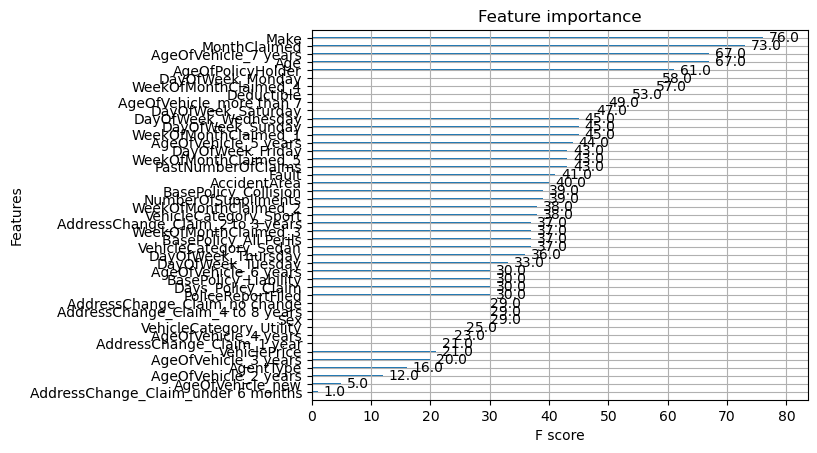

In [113]:
from xgboost import plot_importance
plot_importance(xgboost_model_2)

## Hyper Parameter Tuning for LR

In [114]:
num_eval = 50

LR_param_hyperopt = {
            'warm_start' : hp.choice('warm_start', [True, False]),
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'solver' : hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag', 'saga']),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'multi_class' : 'auto',
            'class_weight' : 'balanced',
}

In [115]:
load = False
if(load == False):
    LR_hyperopt1 = hyperopt(LR_param_hyperopt,  num_eval, LogisticRegression)
    save_file('TuningFS/LR_hyperopt1.pkl', LR_hyperopt1)
else:
    try:
        LR_hyperopt1 = load_file('TuningFS/LR_hyperopt1.pkl')
    except Exception as e:
        print(e)

100%|██████████| 50/50 [00:49<00:00,  1.01trial/s, best loss: -0.39988492520138086]


In [116]:
LR_hyperopt1[1]

{'C': 2.6858152101529438,
 'fit_intercept': 1,
 'max_iter': 727,
 'solver': 0,
 'tol': 4.921311382710727e-05,
 'warm_start': 1}

In [117]:
trials = LR_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [118]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,solver,tol,warm_start
20,-0.399885,[2.6778356950343483],[1],[348],[1],[5.105388068650495e-05],[1]
1,-0.399885,[2.6858152101529438],[1],[727],[0],[4.921311382710727e-05],[1]
26,-0.399885,[2.709714442055663],[1],[437],[1],[1.4305114314347667e-05],[1]
32,-0.399885,[2.5993859999217066],[1],[685],[4],[9.342393591667699e-05],[0]
28,-0.399885,[2.7124090598916566],[1],[716],[4],[7.736878117665596e-05],[0]
22,-0.399655,[2.5177456898656336],[1],[351],[1],[5.477016090396077e-05],[1]
23,-0.399655,[2.4509893044749638],[1],[162],[0],[2.6990258277647635e-05],[1]
48,-0.399655,[1.8245774160684074],[1],[281],[0],[2.7700320849116243e-05],[1]
25,-0.399655,[2.994834897383375],[1],[348],[0],[5.001133830682556e-05],[1]
27,-0.399655,[2.237731487754421],[1],[286],[0],[1.7186554202728862e-05],[1]


In [119]:
lr_chosen = LR_hyperopt1[1]

LR_model_1   =   LogisticRegression(warm_start=[True, False][lr_chosen['warm_start']],
                                    fit_intercept=[True, False][lr_chosen['fit_intercept']],
                                    tol= lr_chosen['tol'],
                                    C=lr_chosen['C'],
                                    solver=['lbfgs','newton-cg','liblinear','sag', 'saga'][lr_chosen['solver']],
                                    max_iter=lr_chosen['max_iter'],
                                    multi_class='auto',
                                    class_weight='balanced',
                                    random_state=19)

In [120]:
LR_model_1

LogisticRegression(C=2.6858152101529438, class_weight='balanced',
                   fit_intercept=False, max_iter=727, random_state=19,
                   tol=4.921311382710727e-05)

In [121]:
train_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=19))

Confusion Matrix: 
 [[1417    4]
 [  89    0]]
TN: 1417, FP: 4, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


In [122]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LogisticRegression(random_state=19))

Confusion Matrix: 
 [[840 581]
 [  7  82]]
TN: 840, FP: 581, FN: 7, TP: 82


Precision:  0.12368024132730016
Recall:  0.9213483146067416
F2:  0.40235525024533864
G-Mean:  0.7379968819697605


(0.12368024132730016,
 0.9213483146067416,
 0.40235525024533864,
 0.7379968819697605)

In [123]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LR_model_1)

Confusion Matrix: 
 [[877 544]
 [ 10  79]]
TN: 877, FP: 544, FN: 10, TP: 79


Precision:  0.12680577849117175
Recall:  0.8876404494382022
F2:  0.4034729315628192
G-Mean:  0.7401526527968104


(0.12680577849117175,
 0.8876404494382022,
 0.4034729315628192,
 0.7401526527968104)

## Hyper Parameter Tuning for SVC

In [124]:
num_eval = 50

SVC_param_hyperopt = {
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'class_weight' : 'balanced',
                }

In [125]:
load = False
if(load == False):
    SVC_hyperopt1 = hyperopt(SVC_param_hyperopt,  num_eval, LinearSVC)
    save_file('TuningFS/SVC_hyperopt1.pkl', SVC_hyperopt1)
else:
    try:
        SVC_hyperopt1 = load_file('TuningFS/SVC_hyperopt1.pkl')
    except Exception as e:
        print(e)

100%|██████████| 50/50 [00:35<00:00,  1.40trial/s, best loss: -0.4079382579933848] 


In [126]:
SVC_hyperopt1[1]

{'C': 1.8016761613425625,
 'fit_intercept': 1,
 'max_iter': 245,
 'tol': 1.2414070119536723e-05}

In [127]:
trials = SVC_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [128]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,tol
42,-0.407938,[1.8016761613425625],[1],[245],[1.2414070119536723e-05]
48,-0.407041,[2.0813162658854187],[1],[418],[3.0263478440863826e-05]
40,-0.405924,[1.5449029998089563],[1],[245],[4.396622665601593e-05]
23,-0.405773,[2.6910696930856326],[0],[506],[5.316876406464389e-05]
19,-0.405702,[2.519802907375158],[0],[462],[5.617382095497468e-05]
15,-0.405329,[2.2924009092549817],[0],[67],[9.843420231190464e-05]
5,-0.404513,[1.1477943291955244],[1],[109],[9.456808956838651e-05]
29,-0.404151,[2.9958718494460297],[0],[249],[8.245474774382653e-05]
4,-0.403985,[0.5358694165212884],[1],[54],[2.0316038116937395e-05]
14,-0.403450,[1.6842476822830106],[1],[242],[9.149939938251728e-05]


In [129]:
SVC_chosen = SVC_hyperopt1[1]

SVC_model_1   =   LinearSVC(fit_intercept=[True, False][SVC_chosen['fit_intercept']],
                                    tol= SVC_chosen['tol'],
                                    C=SVC_chosen['C'],
                                    max_iter=SVC_chosen['max_iter'],
                                    class_weight='balanced',
                                    random_state=19)

### Model Without Tuning

In [130]:
train_model(X_train, X_test, y_train, y_test, LinearSVC(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  88    1]]
TN: 1421, FP: 0, FN: 88, TP: 1


Precision:  1.0
Recall:  0.011235955056179775
F2:  0.014005602240896357
G-Mean:  0.105999788000636


### Model without tuning but with imbalance handling

In [131]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LinearSVC(random_state=19))

Confusion Matrix: 
 [[830 591]
 [  6  83]]
TN: 830, FP: 591, FN: 6, TP: 83


Precision:  0.12314540059347182
Recall:  0.9325842696629213
F2:  0.4029126213592233
G-Mean:  0.7380504512277681


(0.12314540059347182,
 0.9325842696629213,
 0.4029126213592233,
 0.7380504512277681)

### Model With Tuning

In [132]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,SVC_model_1)

Confusion Matrix: 
 [[833 588]
 [  6  83]]
TN: 833, FP: 588, FN: 6, TP: 83


Precision:  0.12369597615499255
Recall:  0.9325842696629213
F2:  0.40408958130477124
G-Mean:  0.7393830742531623


(0.12369597615499255,
 0.9325842696629213,
 0.40408958130477124,
 0.7393830742531623)

# Voting Classifier with tuned models

### Model Without Tuning

In [133]:
vc1 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [134]:
train_model(X_train, X_test, y_train, y_test, vc1)

Confusion Matrix: 
 [[1421    0]
 [  89    0]]
TN: 1421, FP: 0, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [140]:
vc2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19, class_weight = 'balanced')),
                ('XGB',XGBClassifier(random_state=19, scale_pos_weight=5)),
                ('LR',LogisticRegression(random_state=19, class_weight = 'balanced'))],
    voting='hard'
)

In [141]:
train_model(X_train, X_test, y_train, y_test, vc2)

Confusion Matrix: 
 [[838 583]
 [  7  82]]
TN: 838, FP: 583, FN: 7, TP: 82


Precision:  0.12330827067669173
Recall:  0.9213483146067416
F2:  0.4015670910871695
G-Mean:  0.7371177906726598


### Model with Tuning

In [151]:
vc3 = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),('LR',LR_model_1), ('LinearSVC', SVC_model_1)],
    voting='hard'
)

In [152]:
train_model(X_train, X_test, y_train, y_test, vc3)

Confusion Matrix: 
 [[1265  156]
 [  53   36]]
TN: 1265, FP: 156, FN: 53, TP: 36


Precision:  0.1875
Recall:  0.4044943820224719
F2:  0.32846715328467146
G-Mean:  0.6000735313014836


In [153]:
vc3

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=0.2917983375337534,
                                            colsample_bynode=0.7975749355233602,
                                            colsample_bytree=0.39544192286788576,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=7.3631002768053895,
                                            gpu_id=None, grow_policy=None,...
                                            num_parallel_tree=None,
                                            predictor=None, random_state=19, ...)),
                             ('LR',
                              LogisticRegression(C=2.6858152101529438,
                                                 class_weight='balanced',
                                                 fit_intercept=False,
                                                 max_iter=727, random_state=19,
                                                 tol=4.921311382710727e-05)),
                             ('LinearSVC',
                              LinearSVC(C=1.8016761613425625,
                                        class_weight='balanced',
                                        fit_intercept=False, max_iter=245,
                                        random_state=19,
                                        tol=1.2414070119536723e-05))])